# Scikit-learn

We will not introduce Machine Learning to you here, there are other courses for that. However, it is useful to know what Python can already do - such that you don't have to implement it yourself.

From [Jake VanderPlas's Python Data Science Tutorial](https://github.com/jakevdp/PythonDataScienceHandbook/blob/599aa0fe3f882c0001670e676e5a8d43b92c35fc/notebooks/Index.ipynb)

* Supervised learning: Models that can predict labels based on labeled training data
  * Classification: Models that predict labels as two or more discrete categories
  * Regression: Models that predict continuous labels
* Unsupervised learning: Models that identify structure in unlabeled data
  * Clustering: Models that detect and identify distinct groups in the data
  * Dimensionality reduction: Models that detect and identify lower-dimensional structure in higher-dimensional data

## Scikit-Learn's Estimator API

Most commonly, the steps in using the Scikit-Learn estimator API are as follows:

1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector following the discussion above.
4. Fit the model to your data by calling the fit() method of the model instance.
5. Apply the Model to new data:
   * For supervised learning, often we predict labels for unknown data using the predict() method.
   * For unsupervised learning, we often transform or infer properties of the data using the transform() or predict() method.

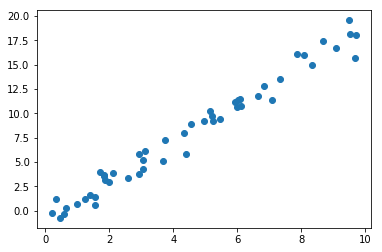

In [34]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

In [32]:
# choose a model
from sklearn.linear_model import LinearRegression
# choose hyperparameters (in this case: do we want to fit for the offset? 
#    Do we want the model to be normalized? Do we want to preprocessing?
#    Do we want regularization? ...)
model = LinearRegression(fit_intercept=True)
# arrange data into feature matrix and target vector
X = x[:, np.newaxis]
# t the model to the data
model.fit(X, y)

model.coef_, model.intercept_

(array([1.9776566]), -0.9033107255311146)

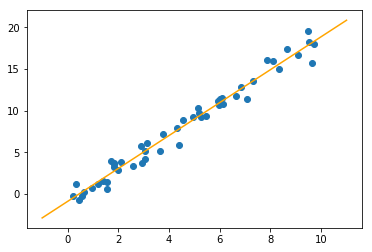

In [41]:
plt.scatter(x, y)
plt.plot(np.linspace(-1, 11), model.coef_[0]*np.linspace(-1, 11) + model.intercept_, color="orange");

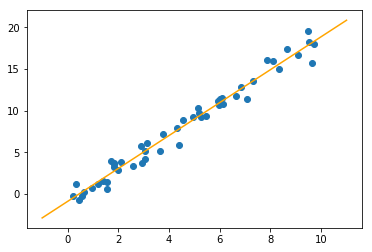

In [42]:
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)
plt.scatter(x, y)
plt.plot(xfit, yfit, color="orange");

# Sklearn - examples

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets.samples_generator import make_blobs

# common plot formatting for below
def format_plot(ax, title):
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.set_xlabel('feature 1', color='gray')
    ax.set_ylabel('feature 2', color='gray')
    ax.set_title(title, color='gray')

## Classification

[-1, 4, -2, 7]

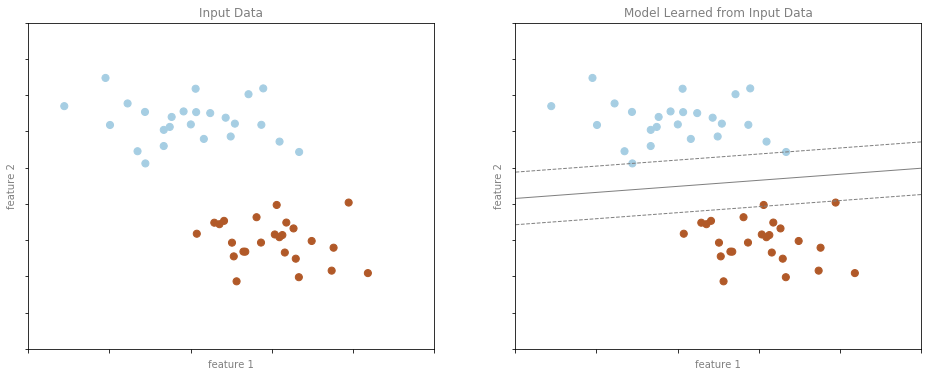

In [22]:
from sklearn.svm import SVC
# create 50 separable points
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

# fit the support vector classifier model
clf = SVC(kernel='linear')
clf.fit(X, y)

# create some new points to predict
X2, _ = make_blobs(n_samples=80, centers=2, random_state=0, cluster_std=0.80)
X2 = X2[50:]

# predict the labels
y2 = clf.predict(X2)

#################################################
# plot the data
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
point_style = dict(cmap='Paired', s=50)
ax[0].scatter(X[:, 0], X[:, 1], c=y, **point_style)

# format plot
format_plot(ax[0], 'Input Data')
ax[0].axis([-1, 4, -2, 7])

#################################################
# Get contours describing the model
xx = np.linspace(-1, 4, 10)
yy = np.linspace(-2, 7, 10)
xy1, xy2 = np.meshgrid(xx, yy)
Z = np.array([clf.decision_function([t]) for t in zip(xy1.flat, xy2.flat)]).reshape(xy1.shape)

# plot points and model
line_style = dict(levels = [-1.0, 0.0, 1.0], linestyles = ['dashed', 'solid', 'dashed'], colors = 'gray', linewidths=1)
ax[1].scatter(X[:, 0], X[:, 1], c=y, **point_style)
ax[1].contour(xy1, xy2, Z, **line_style)

# format plot
format_plot(ax[1], 'Model Learned from Input Data')
ax[1].axis([-1, 4, -2, 7])

## Regression

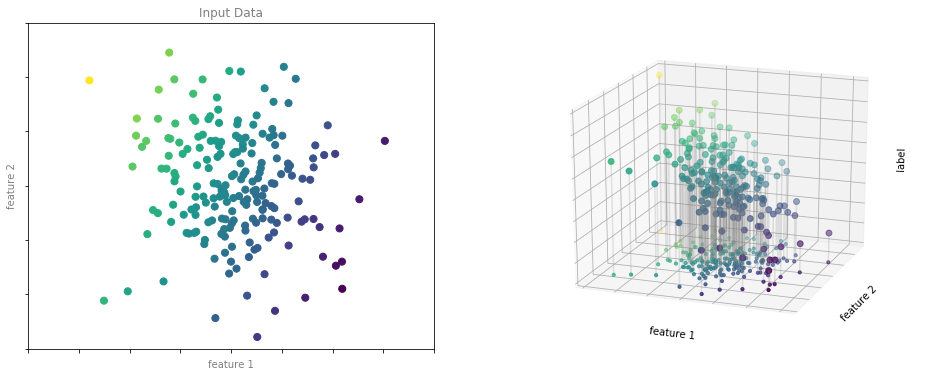

In [26]:
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d.art3d import Line3DCollection

# Create some data for the regression
rng = np.random.RandomState(1)

X = rng.randn(200, 2)
y = np.dot(X, [-2, 1]) + 0.1 * rng.randn(X.shape[0])

# fit the regression model
model = LinearRegression()
model.fit(X, y)

# create some new points to predict
X2 = rng.randn(100, 2)

# predict the labels
y2 = model.predict(X2)


#################################################
# plot data points
fig=plt.figure(figsize=(16, 6))
ax1=fig.add_subplot(1,2,1)
points = ax1.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')

# format plot
format_plot(ax1, 'Input Data')
ax1.axis([-4, 4, -3, 3])



#################################################
points = np.hstack([X, y[:, None]]).reshape(-1, 1, 3)
segments = np.hstack([points, points])
segments[:, 0, 2] = -8

# plot points in 3D
ax2=fig.add_subplot(1,2,2, projection='3d')
ax2.scatter(X[:, 0], X[:, 1], y, c=y, s=35, cmap='viridis')
ax2.add_collection3d(Line3DCollection(segments, colors='gray', alpha=0.2))
ax2.scatter(X[:, 0], X[:, 1], -8 + np.zeros(X.shape[0]), c=y, s=10, cmap='viridis')

# format plot
ax2.patch.set_facecolor('white')
ax2.view_init(elev=20, azim=-70)
ax2.set_zlim3d(-8, 8)
ax2.xaxis.set_major_formatter(plt.NullFormatter())
ax2.yaxis.set_major_formatter(plt.NullFormatter())
ax2.zaxis.set_major_formatter(plt.NullFormatter())
ax2.set(xlabel='feature 1', ylabel='feature 2', zlabel='label')

# Hide axes (is there a better way?)
ax2.w_xaxis.line.set_visible(False)
ax2.w_yaxis.line.set_visible(False)
ax2.w_zaxis.line.set_visible(False)
for tick in ax2.w_xaxis.get_ticklines():
    tick.set_visible(False)
for tick in ax2.w_yaxis.get_ticklines():
    tick.set_visible(False)
for tick in ax2.w_zaxis.get_ticklines():
    tick.set_visible(False)

# Clustering

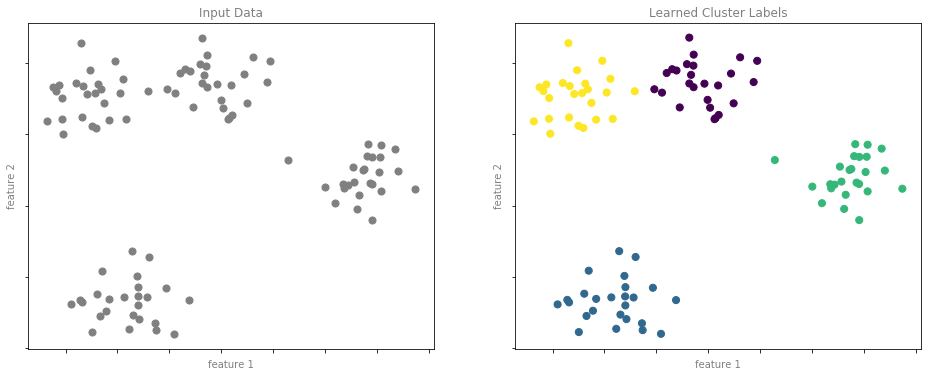

In [28]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

# create 50 separable points
X, y = make_blobs(n_samples=100, centers=4, random_state=42, cluster_std=1.5)

# Fit the K Means model
model = KMeans(4, random_state=0)
y = model.fit_predict(X)

#################################################

# plot the input data
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(X[:, 0], X[:, 1], s=50, color='gray')

# format the plot
format_plot(ax[0], 'Input Data')

#################################################

# plot the data with cluster labels
ax[1].scatter(X[:, 0], X[:, 1], s=50, c=y, cmap='viridis')

# format the plot
format_plot(ax[1], 'Learned Cluster Labels')


## Dimensionality Reduction

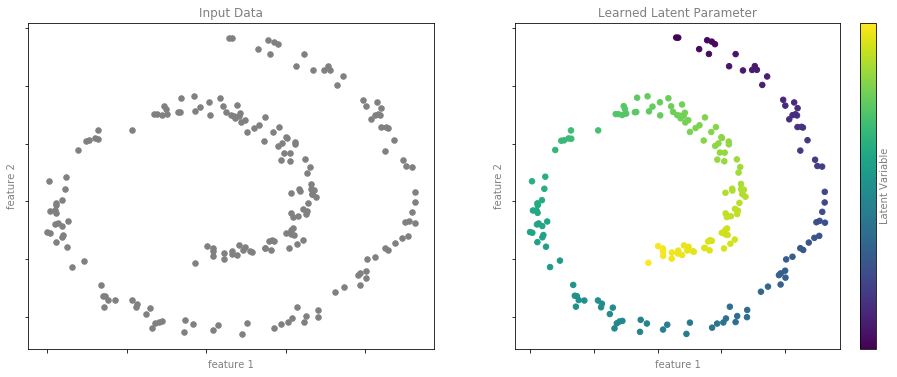

In [29]:
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import Isomap

# make data
X, y = make_swiss_roll(200, noise=0.5, random_state=42)
X = X[:, [0, 2]]


#################################################
# visualize data
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(X[:, 0], X[:, 1], color='gray', s=30)

# format the plot
format_plot(ax[0], 'Input Data')


model = Isomap(n_neighbors=8, n_components=1)
y_fit = model.fit_transform(X).ravel()

#################################################
# visualize data
pts = ax[1].scatter(X[:, 0], X[:, 1], c=y_fit, cmap='viridis', s=30)
cb = fig.colorbar(pts, ax=ax[1])

# format the plot
format_plot(ax[1], 'Learned Latent Parameter')
cb.set_ticks([])
cb.set_label('Latent Variable', color='gray')


## MNIST-Dataset

/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


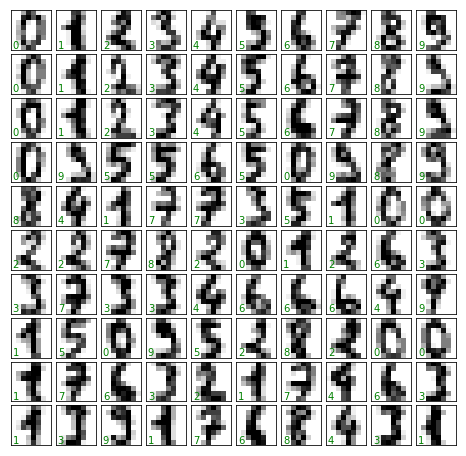

In [45]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split

digits = load_digits()

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [52]:
X = digits.data
y = digits.target
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0);

In [53]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

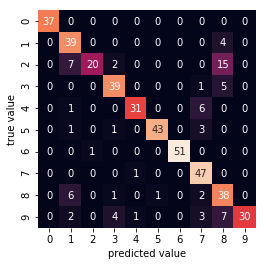

In [50]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

In [55]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(Xtrain, ytrain)
y_model = clf.predict(Xtest)
accuracy_score(ytest, y_model)

0.4866666666666667

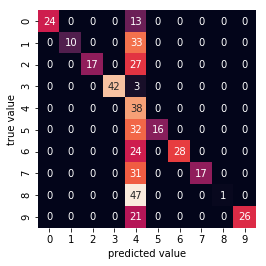

In [56]:
mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

## Feature engineering

https://github.com/jakevdp/PythonDataScienceHandbook/blob/599aa0fe3f882c0001670e676e5a8d43b92c35fc/notebooks/05.04-Feature-Engineering.ipynb